In [1]:
# Importing required libraries
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime
import warnings
import json

In [2]:
# Suppressing warnings
warnings.filterwarnings('ignore')

In [3]:
# Defining ticker symbol
tickerSymbol = "TSLA"
df = yf.Ticker(tickerSymbol)
df

yfinance.Ticker object <TSLA>

In [4]:
# Define end date, start date, and tomorrow's date
end_date = datetime.datetime.now().date()
start_date = end_date - datetime.timedelta(days=730)
tomorrow = end_date + datetime.timedelta(days=1)

In [5]:
# Fetch historical prices
prices = df.history(start=start_date, end=end_date).Close

In [6]:
# Calculate returns
returns = prices.pct_change().dropna()

Text(0.5, 1.0, 'Returns of TSLA')

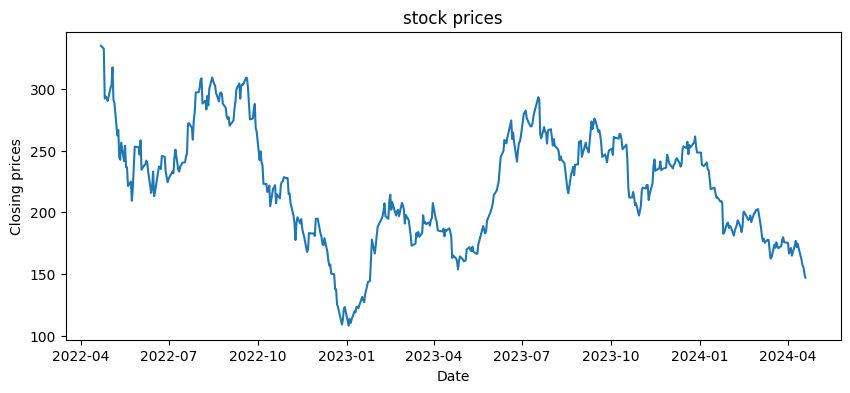

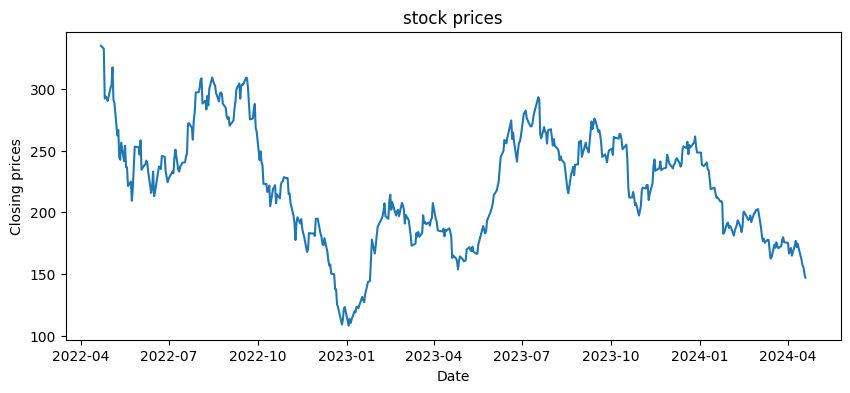

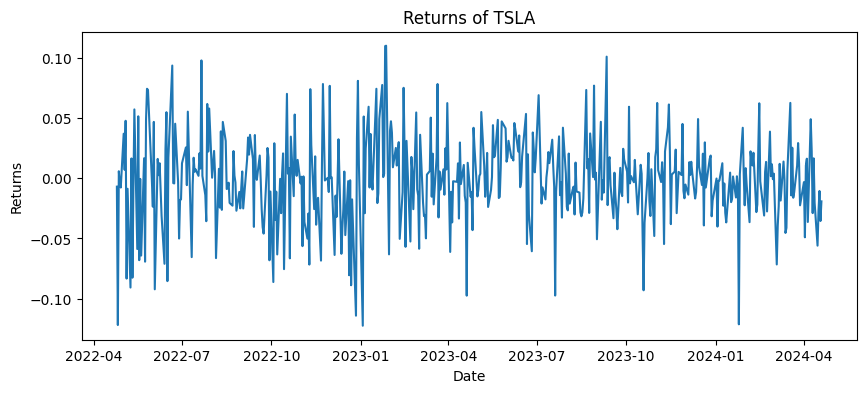

In [7]:
# Plotting past stock prices, current price, and future prediction
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel("Closing prices")
plt.xlabel("Date")
plt.title("stock prices")
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel("Closing prices")
plt.xlabel("Date")
plt.title("stock prices")

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel("Returns")
plt.xlabel("Date")
plt.title("Returns of TSLA")

In [8]:
# Building the ARIMA model
model = ARIMA(prices, order=(4, 1, 4))
fitted = model.fit()

In [9]:
# Predicting the next day price
next_day_price = fitted.forecast(steps=1, alpha=0.05)
predicted_price = next_day_price.values[0]
print(predicted_price)

145.4589368081515


In [10]:
# Define future dates for the predicted prices
future_dates = pd.date_range(start=end_date, periods=1)

In [11]:
# Convert future dates to the appropriate timezone
future_dates = future_dates.tz_localize('UTC').tz_convert('America/New_York')

In [12]:
# Combine past prices, current prices, and future predictions into a single DataFrame
combined_prices = pd.concat([prices, pd.Series(predicted_price, index=future_dates)])

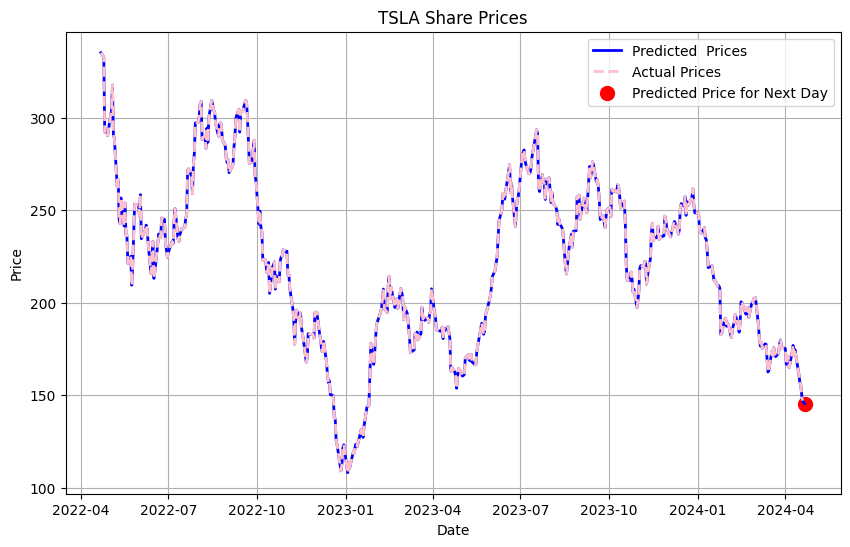

In [13]:
# Plotting combined prices
plt.figure(figsize=(10, 6))
plt.plot(combined_prices, color='blue', label='Predicted  Prices', linestyle='-', linewidth=2)
plt.plot(prices, color='pink', label='Actual Prices', linestyle='--', linewidth=2)
plt.scatter(tomorrow, predicted_price, color='red', label='Predicted Price for Next Day', marker='o', s=100)
plt.title("TSLA Share Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

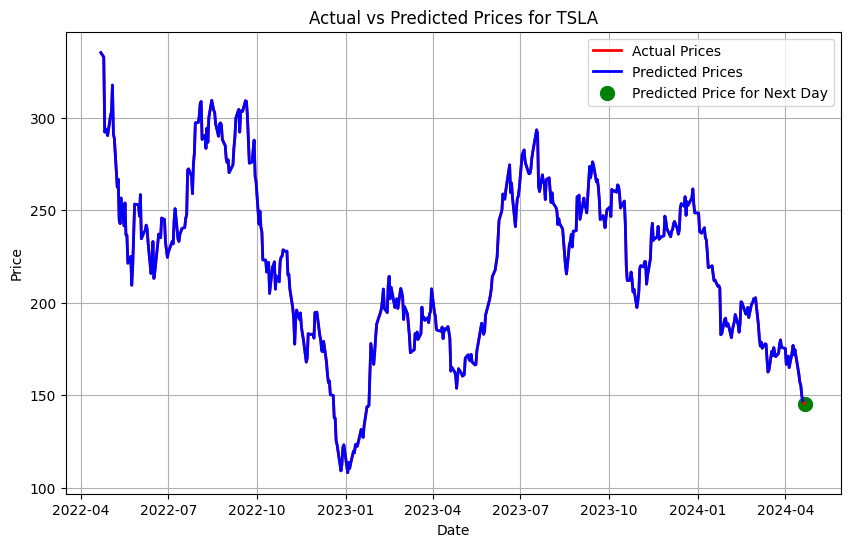

In [14]:
# Plotting combined prices
plt.figure(figsize=(10, 6))
plt.plot(combined_prices, color='red', label='Actual Prices', linestyle='-', linewidth=2)
plt.plot(prices, color='blue', label='Predicted Prices', linestyle='-', linewidth=2)
plt.scatter(tomorrow, predicted_price, color='green', label='Predicted Price for Next Day', marker='o', s=100)
plt.title("Actual vs Predicted Prices for TSLA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Convert the plot to a JSON string
graph_data = json.dumps({
  "labels": combined_prices.index.strftime("%Y-%m-%d").tolist(),
  "prices": combined_prices.tolist()
})

# Print the JSON string
print(graph_data)

{"labels": ["2022-04-22", "2022-04-25", "2022-04-26", "2022-04-27", "2022-04-28", "2022-04-29", "2022-05-02", "2022-05-03", "2022-05-04", "2022-05-05", "2022-05-06", "2022-05-09", "2022-05-10", "2022-05-11", "2022-05-12", "2022-05-13", "2022-05-16", "2022-05-17", "2022-05-18", "2022-05-19", "2022-05-20", "2022-05-23", "2022-05-24", "2022-05-25", "2022-05-26", "2022-05-27", "2022-05-31", "2022-06-01", "2022-06-02", "2022-06-03", "2022-06-06", "2022-06-07", "2022-06-08", "2022-06-09", "2022-06-10", "2022-06-13", "2022-06-14", "2022-06-15", "2022-06-16", "2022-06-17", "2022-06-21", "2022-06-22", "2022-06-23", "2022-06-24", "2022-06-27", "2022-06-28", "2022-06-29", "2022-06-30", "2022-07-01", "2022-07-05", "2022-07-06", "2022-07-07", "2022-07-08", "2022-07-11", "2022-07-12", "2022-07-13", "2022-07-14", "2022-07-15", "2022-07-18", "2022-07-19", "2022-07-20", "2022-07-21", "2022-07-22", "2022-07-25", "2022-07-26", "2022-07-27", "2022-07-28", "2022-07-29", "2022-08-01", "2022-08-02", "2022-08